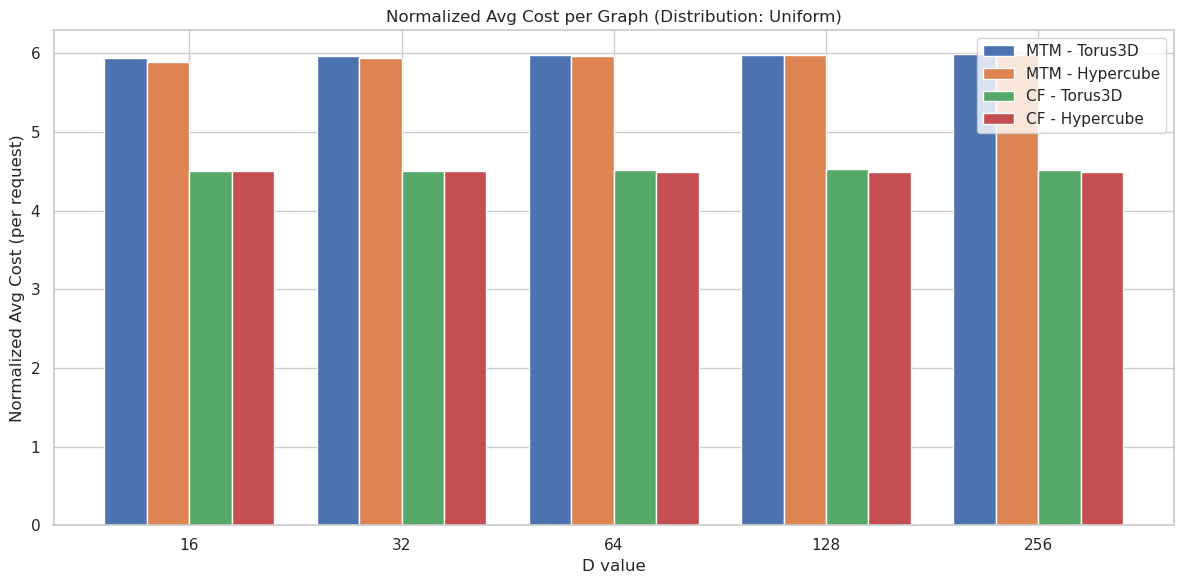

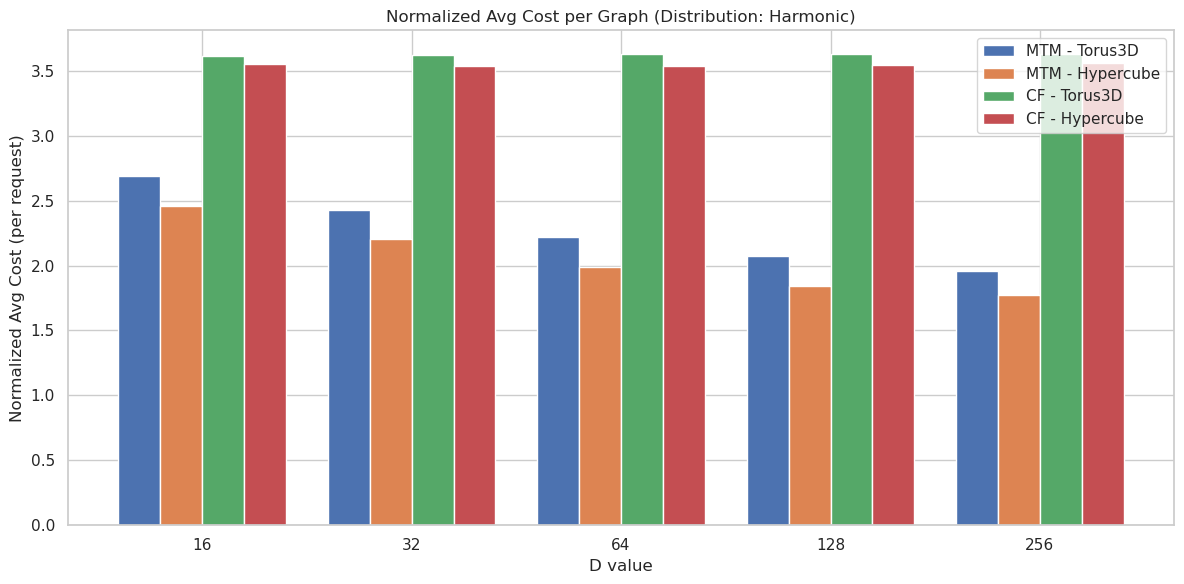

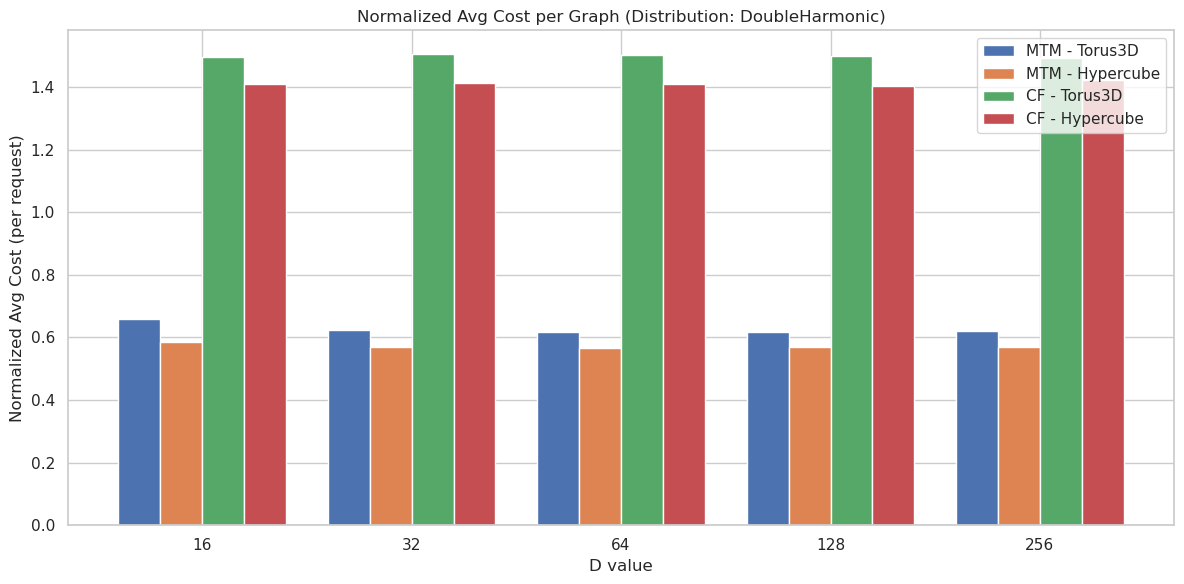

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df = pd.read_csv("results.csv")

# Normalize costs
df['MoveToMin'] = df['MoveToMin'] / 65536
df['CoinFlip'] = df['CoinFlip'] / 65536

# Get unique distributions and D values
distributions = df['Distribution'].unique()
Ds = sorted(df['D'].unique())

for dist in distributions:
    # Filter by distribution
    df_dist = df[df['Distribution'] == dist]

    # Group by Graph and D, compute average normalized costs
    grouped = df_dist.groupby(['Graph', 'D'])[['MoveToMin', 'CoinFlip']].mean().unstack(level=0)

    # Extract values
    move_to_min_t3d = grouped['MoveToMin']['Torus3D']
    move_to_min_hc  = grouped['MoveToMin']['Hypercube']
    coin_flip_t3d   = grouped['CoinFlip']['Torus3D']
    coin_flip_hc    = grouped['CoinFlip']['Hypercube']

    x = range(len(Ds))
    width = 0.2

    plt.figure(figsize=(12, 6))
    plt.bar([i - 1.5*width for i in x], move_to_min_t3d, width, label='MTM - Torus3D')
    plt.bar([i - 0.5*width for i in x], move_to_min_hc,  width, label='MTM - Hypercube')
    plt.bar([i + 0.5*width for i in x], coin_flip_t3d,   width, label='CF - Torus3D')
    plt.bar([i + 1.5*width for i in x], coin_flip_hc,    width, label='CF - Hypercube')

    plt.title(f"Normalized Avg Cost per Graph (Distribution: {dist})")
    plt.xlabel("D value")
    plt.ylabel("Normalized Avg Cost (per request)")
    plt.xticks(x, Ds)
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
